<a href="https://colab.research.google.com/github/NimishMalhotra/SetimentAnalysisUsingNeuralNetworks/blob/master/Sentiment_Analysis_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying Movie Reviews**

- Binary Classification on IMDB Dataset
- Working with Text and MultiLayer Perceptron
- Input - 50,000 Reviews
- Output - Positive and Negative


In [ ]:
from keras.datasets import imdb

# Data Preparation

In [ ]:
((X_train,Y_train),(X_test,Y_test)) = imdb.load_data(num_words=10000) # How many unique words you want, the most frequent 10,000 words will be kept in my dataset

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
len(X_train) # No. of reviews

25000

In [ ]:
len(X_test)

25000

In [ ]:
# Print the 0th review
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Keras convert the text into numbers according to the vocab

word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [82]:
# To see the key value pair in the vocab dictonary
#print(word_idx.items())

In [ ]:
# To see the actual review- Create a reeverse dictonary which maps indexes to words
idx_words = dict([value,key] for (key,value) in word_idx.items())

In [83]:
#print(idx_words)

In [84]:
#print(idx_words.items())

In [ ]:
actual_review = ' '.join([idx_words.get(idx-3,'#') for idx in X_train[0]]) # the # was if we dont get this idx-3 in dictonary

In [ ]:
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# Some of type of preprocessing like stopword removal has already been done to the review.

## Vectorize the data

- Vocab Size is 10,000
- We will make sure that every review is represented by a vector of size 10,000 and it would be collection of 0's and 1's [00001001010..........10101001111000]
- The ith index will be set to 1 if there is word in sentence for that index.
- Otherwise it will be set to 0.
- Transform the data into fixed length vectors.
- For every example/review the neural network will accept fixed no. of features/input units.
- But the problem with the current vector that we get in training set is that the length of vector is proportional to length of review. So a big review will have a big input vector and a small review has a small input vector.
- So the no. of features are not constant over all the examples.
- Every sentence/review should have same no. of features so that our algo could process it.
- Each example/review now has 10K features.
- Inorder to convert the review into a vector of length 10K either we can use count_vectorizer method (built-in) or we can create one own our own.

In [ ]:
print(X_train.shape)

(25000,)


In [ ]:
print(Y_train.shape)

(25000,)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
def vectorize_sentences(sentences,dim=10000):
  """Accepts the entire dataset of reviews and convert each review into a vector of 0's and 1's"""
  train_data = np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    # i denotes the ith review and idx denotes list of indices for the ith review because ith review is list of indexes 
    train_data[i,idx] = 1
  
  return train_data

In [ ]:
train_data = vectorize_sentences(X_train)

In [ ]:
train_data.shape

(25000, 10000)

In [ ]:
X_train.shape

(25000,)

In [ ]:
X_train = train_data

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
X_test = vectorize_sentences(X_test)

In [ ]:
X_test.shape

(25000, 10000)

In [ ]:
# For both training and testing set we have 25,000 sentences each having 10,000 ffeatures.

In [ ]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
print(Y_train)

[1 0 0 ... 0 1 0]


In [ ]:
Y_train = np.asarray(Y_train).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

# Build Our Network

# Define Model Architecture

- Use Fully Connected/ Dense Layers with Relu Activation
- 2 Hidden Layers with 16 units each
- 1 output layer with 1 unit(sigmoid activation)
- 1 for positive review and 0 for a negative review
- 10,000 units in input layer
- Hidden Layers are called dense layers.
- Relu activation will be used in the hidden layers.

In [ ]:
from keras import models
from keras.layers import Dense

# Define the Model

In [ ]:
# models is a sequential class
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,))) # specify input_shape for the first hidden layer, 10,000 input units for 1 example, no. of examples will be automatically be handled by the keras
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #output layer


# Compile the Model

In [ ]:
# We have to update the weights and biases during backpropagation
# Optimizers are used to adjust the weights inorder to minimize the loss.
# Optimizers - Gradient Descent, Stochastic Gradient Descent etc.

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and Validation

In [ ]:
# Our model has more no. of parameters(weights and biases) than the no. of examples in the training set.
# Model may overfit.
# Inorder to avoid overfitting we need to have a validation set.
# Validation is a subset of training set

In [ ]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]

Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [ ]:
# fit returns a history object
# it uses mini batch gradient descent where you make weight updates after each batch has passed through network
# batch size is generally kept as a multiple of 2
# if you have a very large data , smaller batch is beneficial so that your data fits easily into memory
# if you get out of memory error due to a large batch size, then use smaller batch size

In [ ]:
hist = model.fit(X_train_new,Y_train_new,epochs=20,batch_size=512,validation_data=(X_val,Y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 265us/step - loss: 0.4904 - accuracy: 0.8091 - val_loss: 0.3742 - val_accuracy: 0.8634
Epoch 2/20
20000/20000 [==============================] - 1s 51us/step - loss: 0.2819 - accuracy: 0.9058 - val_loss: 0.2876 - val_accuracy: 0.8894
Epoch 3/20
20000/20000 [==============================] - 1s 51us/step - loss: 0.2095 - accuracy: 0.9281 - val_loss: 0.2719 - val_accuracy: 0.8920
Epoch 4/20
20000/20000 [==============================] - 1s 51us/step - loss: 0.1708 - accuracy: 0.9407 - val_loss: 0.2708 - val_accuracy: 0.8956
Epoch 5/20
20000/20000 [==============================] - 1s 50us/step - loss: 0.1419 - accuracy: 0.9530 - val_loss: 0.2987 - val_accuracy: 0.8850
Epoch 6/20
20000/20000 [==============================] - 1s 50us/step - loss: 0.1197 - accuracy: 0.9606 - val_loss: 0.3507 - val_accuracy: 0.8702
Epoch 7/20
20000/20000 [==============================] - 1s 51us/st

# Visualise Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist?

In [ ]:
# this hist object contains a dictonary
h = hist.history

In [ ]:
h.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

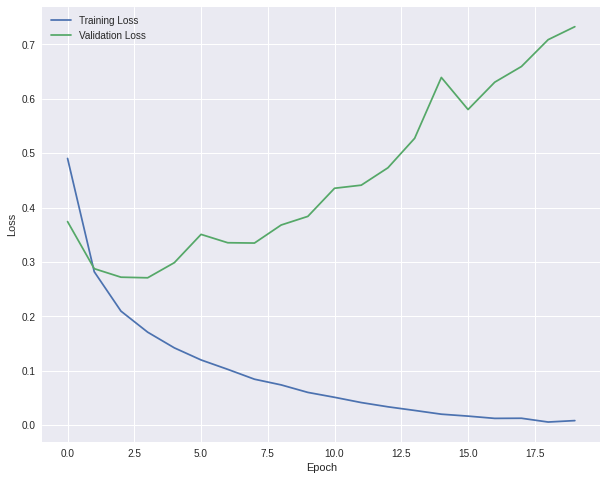

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Validation Loss is initially decreasing but then it starts increasing, this inc is due to overfitting

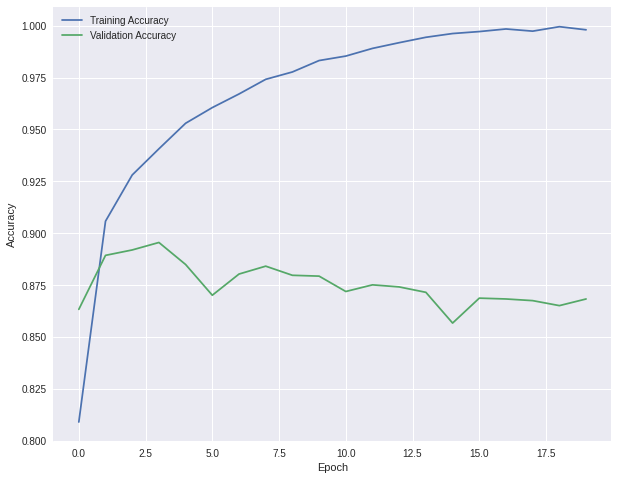

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h['accuracy'],label='Training Accuracy')
plt.plot(h['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Validation Accuracy is max at 3 epochs around 88% but training accuracy approaches 100% due to overfitting. So we need to stop our algo after 3 epochs.

In [ ]:
# We will stop after 3 eopchs and this point is called early stopping.

In [ ]:
hist = model.fit(X_train_new,Y_train_new,epochs=4,batch_size=512,validation_data=(X_val,Y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s 77us/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.8391 - val_accuracy: 0.8558
Epoch 2/4
20000/20000 [==============================] - 1s 51us/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.7973 - val_accuracy: 0.8690
Epoch 3/4
20000/20000 [==============================] - 1s 51us/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.8334 - val_accuracy: 0.8670
Epoch 4/4
20000/20000 [==============================] - 1s 51us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8649 - val_accuracy: 0.8696


In [ ]:
h = hist.history

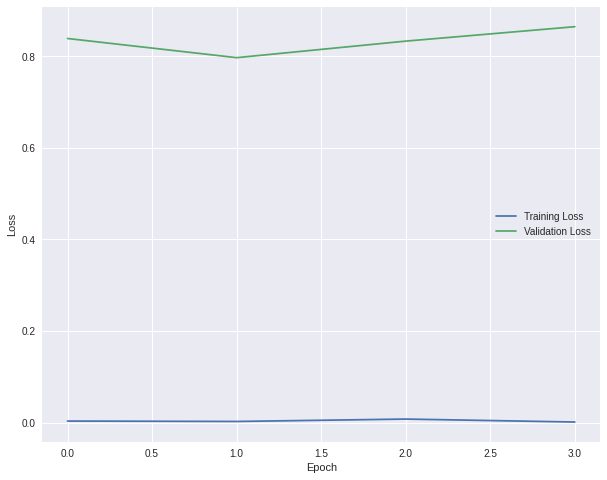

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

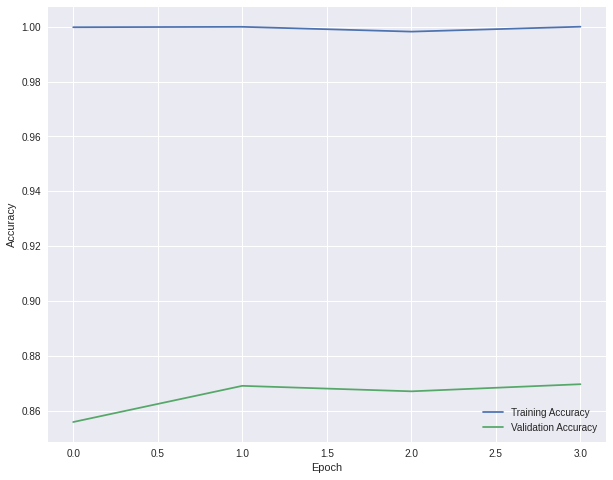

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h['accuracy'],label='Training Accuracy')
plt.plot(h['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing Model

In [ ]:
result = model.evaluate(X_test,Y_test)

25000/25000 [==============================] - 1s 42us/step


In [ ]:
print(result[1]*100) #accuracy on test set

84.78000164031982


In [ ]:
model.evaluate(X_train_new,Y_train_new)[1]

20000/20000 [==============================] - 1s 43us/step


1.0

In [ ]:
# We need to run all cells again because we trained our model for 4 epochs on a previously trained model of 20 epochs.
# So in totality we trained the model for 24 epochs. Inorder to get true results we need to run all cells from start to create a new model and test it.

In [ ]:
# models is a sequential class
model1 = models.Sequential()
model1.add(Dense(16,activation='relu',input_shape=(10000,))) # specify input_shape for the first hidden layer, 10,000 input units for 1 example, no. of examples will be automatically be handled by the keras
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1,activation='sigmoid')) #output layer
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
hist1 = model1.fit(X_train_new,Y_train_new,epochs=4,batch_size=512,validation_data=(X_val,Y_val))
h1 = hist1.history



Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 1s 60us/step - loss: 0.4896 - accuracy: 0.8033 - val_loss: 0.3451 - val_accuracy: 0.8800
Epoch 2/4
20000/20000 [==============================] - 1s 52us/step - loss: 0.2728 - accuracy: 0.9068 - val_loss: 0.2839 - val_accuracy: 0.8908
Epoch 3/4
20000/20000 [==============================] - 1s 52us/step - loss: 0.2035 - accuracy: 0.9305 - val_loss: 0.3140 - val_accuracy: 0.8766
Epoch 4/4
20000/20000 [==============================] - 1s 51us/step - loss: 0.1681 - accuracy: 0.9412 - val_loss: 0.2747 - val_accuracy: 0.8922


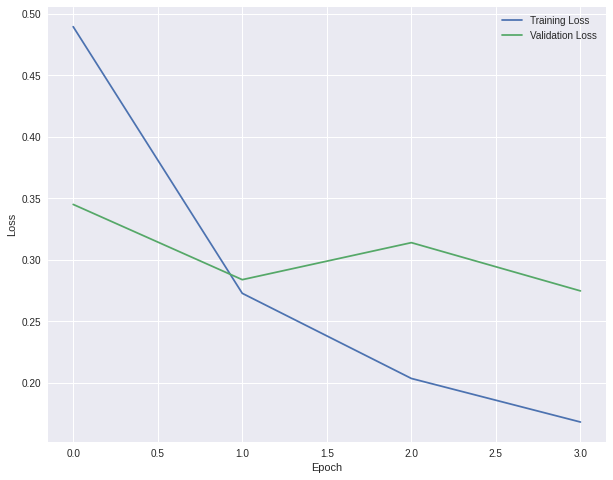

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h1['loss'],label='Training Loss')
plt.plot(h1['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

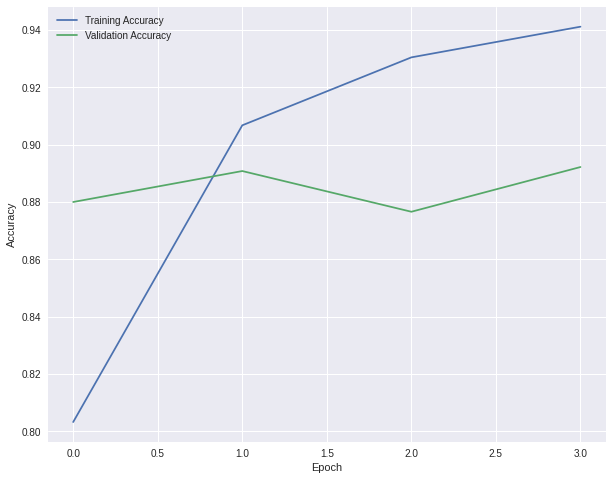

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(h1['accuracy'],label='Training Accuracy')
plt.plot(h1['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# This time the validation loss is also decreasing and there is no jump in the validation loss.
# Validation Accuracy is also increasing all the time during all the epochs and never go down.

In [ ]:
model1.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 1s 50us/step


0.8803600072860718

In [ ]:
model1.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 1s 47us/step


0.9477199912071228

In [ ]:
model1.evaluate(X_train_new,Y_train_new)[1]

20000/20000 [==============================] - 1s 49us/step


0.9616000056266785

In [ ]:
model1.predict(X_test) # you got list of probabilities and you can convert them in the range 0-1 to get the prediction.

array([[0.26487494],
       [0.9999469 ],
       [0.94834924],
       ...,
       [0.16890272],
       [0.15898031],
       [0.67307174]], dtype=float32)

In [ ]:
# This array is an array of confidence i.e, how confident the model is in predicting the class 1
# 0.99 means this review belongs to class 1
# 0.2648 means 26.48% confident you are in saying that it belongs to class 1, so it belongs to class 0
# Convert y_>=0.5 =>1 and y_<0.5 =>0